In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

## Loading the dataset

In [33]:
df = pd.read_csv('/content/twitte_data.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [34]:
#printing datatype of each column..
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

## Preprocessing the dataset

In [35]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [36]:
# remove twitter handles (@user)
df['clean_tweet'] = df['tweet'].apply(lambda x: remove_pattern(x, "@[\w]*"))

In [37]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [38]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [39]:
df = df.drop('tweet', axis = 1)

In [40]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [41]:
# remove stop words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if w not in stopwords]))
df.head()

,id,label,clean_tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,thanks lyft credit t use cause don t offer whe...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society now motivation


In [42]:
combined_text = '' 
for tweet in df.clean_tweet:            #selecting each cleaned resume text
  tweet = str(tweet)                    #converting to string
  tokens = tweet.split()                #splitting into tokens
  for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()     
  combined_text += " ".join(tokens)+" " #combining all the text into one string for purpose for creating wordcloud

In [43]:
combined_text

'father dysfunctional selfish drags kids dysfunction run thanks lyft credit t use cause don t offer wheelchair vans pdx disapointed getthanked bihday majesty model love u take u time ur factsguide society now motivation huge fan fare big talking leave chaos pay disputes allshowandnogo camping tomorrow danny next school year year exams t think school exams hate imagine actorslife revolutionschool girl won love land allin cavs champions cleveland clevelandcavaliers welcome m s gr ireland consumer price index mom climbed previous may blog silver gold forex selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love see daddy today days gettingfed cnn calls michigan middle school build wall chant tcot comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins ouch junior angry got junior yugyoem omg thankful paner thankful positive retweet agree friday smiles around via ig user cookies make people know essential oi

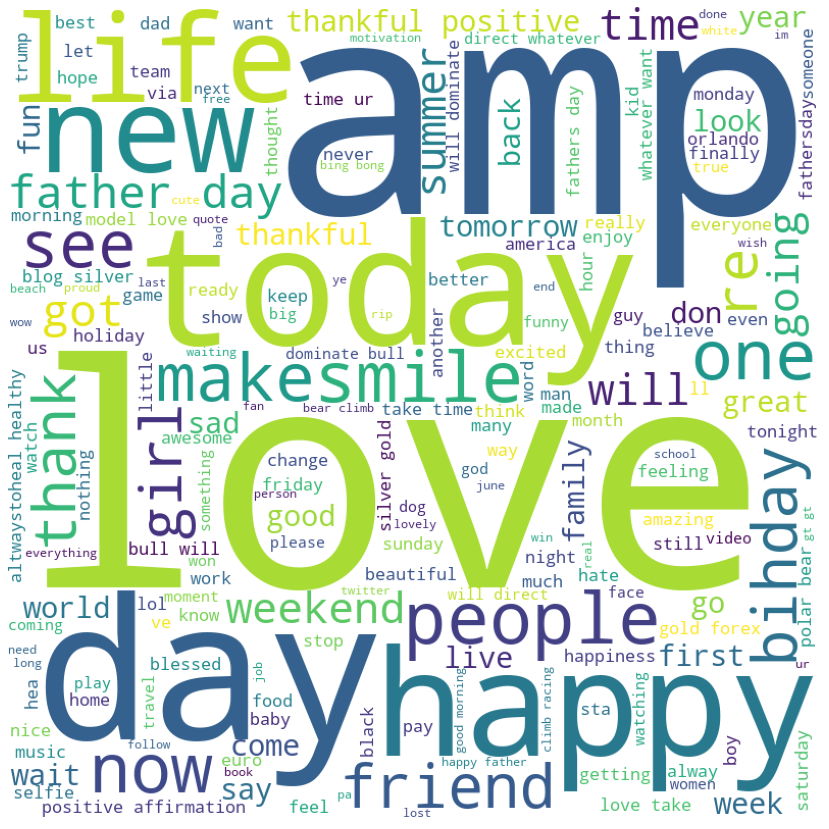

In [44]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(combined_text) 
# plot the WordCloud image                        
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
plt.show()

In [45]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, lyft, credit, t, use, cause, don, t, ...
2                                    [bihday, majesty]
3                  [model, love, u, take, u, time, ur]
4               [factsguide, society, now, motivation]
Name: clean_tweet, dtype: object

In [46]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, lyft, credit, t, use, caus, don, t, of...
2                                    [bihday, majesti]
3                  [model, love, u, take, u, time, ur]
4                     [factsguid, societi, now, motiv]
Name: clean_tweet, dtype: object

In [47]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,clean_tweet
0,1,0,father dysfunct selfish drag kid dysfunct run
1,2,0,thank lyft credit t use caus don t offer wheel...
2,3,0,bihday majesti
3,4,0,model love u take u time ur
4,5,0,factsguid societi now motiv


## Input Split

In [48]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

## Model Training

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [51]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.5059101654846336

In [53]:
accuracy_score(y_test,pred)

0.947691152546615

In [54]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.563953488372093

In [55]:
accuracy_score(y_test,pred)

0.9436866474784132

In [57]:
#saving in pickle file...
import pickle
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(model, 'twitter_sentiment_analysis.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['twitter_sentiment_analysis.pkl']